In [1]:
# traitement des data uniquement avec pandas

#initialisation de pandas
import pandas as pd

In [4]:
# Chargement des données à partir du fichier CSV
df_stars = pd.read_csv('./total_stars.csv')

# Sélection des colonnes utiles uniquement ('Mass', 'Distance', 'Radius')
df_clean = df_stars[['Mass', 'Distance', 'Radius']].copy()

# Nettoyage de la colonne 'Distance' en supprimant tous les caractères non numériques
df_clean['Distance'] = df_clean['Distance'].replace({r'\D': ''}, regex=True).apply(pd.to_numeric, errors='coerce')

# Conversion des colonnes 'Mass' et 'Radius' en numérique (les valeurs non convertibles deviennent NaN)
df_clean['Mass'] = pd.to_numeric(df_clean['Mass'], errors='coerce')
df_clean['Radius'] = pd.to_numeric(df_clean['Radius'].replace({r'[^\d.]': ''}, regex=True), errors='coerce')

# Suppression des lignes contenant des valeurs manquantes (NaN) après nettoyage des données
df_clean.dropna(inplace=True)

# Affichage des 15 premières lignes du DataFrame nettoyé
print(df_clean.head(15))

    Mass  Distance  Radius
0    1.0   15813.0    1.00
1    2.1      86.0    1.71
2   15.0     310.0   71.00
3    1.1      44.0    1.20
4    1.1      37.0   26.00
5    2.2      25.0    2.70
6    2.6      43.0   12.00
7   23.0     860.0   78.90
8    1.5     114.0    1.90
9   20.0    6401.0  950.00
10   6.7     144.0    9.30
11  10.5     390.0    8.60
12   1.8      17.0    1.80
13  18.0     320.0    8.90
14   1.5      65.0   44.00


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

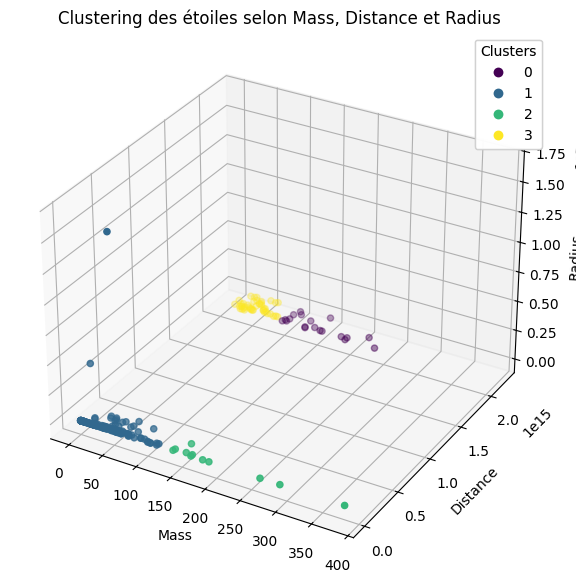

In [7]:
# Normalisation des données avec MinMaxScaler pour que toutes les valeurs soient comprises entre 0 et 1
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_clean)

# Regroupement des données en 4 clusters avec l'algorithme KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(df_normalized)

# Affichage d'un graphique 3D pour visualiser les clusters formés
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_clean['Mass'], df_clean['Distance'], df_clean['Radius'], c=df_clean['Cluster'], cmap='viridis')

# Titre et étiquettes des axes du graphique
ax.set_title('Clustering des étoiles selon Mass, Distance et Radius')
ax.set_xlabel('Mass')
ax.set_ylabel('Distance')
ax.set_zlabel('Radius')

# Légende pour identifier les différents clusters
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Affichage du graphique
plt.show()


In [9]:
# Analyse complémentaire : caractéristiques générales des clusters
cluster_analysis = df_clean.groupby('Cluster').agg(['mean', 'std', 'count']).reset_index()

# Affichage des résultats de l'analyse complémentaire
print(cluster_analysis)

  Cluster        Mass                       Distance                      \
                 mean        std count          mean           std count   
0       0  143.210526  43.039490    19  2.065956e+15  7.199210e+13    19   
1       1   30.257041  28.816945   169  1.583353e+13  3.881151e+13   169   
2       2  200.454545  77.544005    11  1.872158e+13  4.193683e+13    11   
3       3   46.513636  17.018780    44  2.092424e+15  7.006196e+13    44   

          Radius                      
            mean           std count  
0       0.032305  1.703839e-02    19  
1  131778.356039  1.320989e+06   169  
2       4.853654  1.100039e+01    11  
3       0.049596  2.372123e-02    44  


In [10]:
# Validation et évaluation supplémentaire du modèle
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_normalized, df_clean['Cluster'])
print(f"Silhouette Score moyen : {silhouette_avg}")

Silhouette Score moyen : 0.7139867023498321


In [11]:
# Création d'une fonction réutilisable pour prédire le cluster d'une nouvelle étoile
def predire_cluster(masse, distance, rayon):
    # Préparation des données de l'étoile
    etoile_normalisee = scaler.transform([[masse, distance, rayon]])
    # Prédiction du cluster
    cluster = kmeans.predict(etoile_normalisee)[0]
    # Compter le nombre d'étoiles existantes dans ce cluster
    nb_etoiles_cluster = df_clean[df_clean['Cluster'] == cluster].shape[0]
    return cluster, nb_etoiles_cluster

# Exemple d'utilisation
cluster, nb_etoiles = predire_cluster(4.0, 260, 3.4)
print(f"L'étoile appartient au cluster {cluster}, contenant déjà {nb_etoiles} étoiles.")

L'étoile appartient au cluster 1, contenant déjà 169 étoiles.


C:\Users\mat\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [12]:
# Enregistrer et exporter les résultats 
df_clean.to_csv('etoiles_clusters.csv', index=False)